<a href="https://colab.research.google.com/github/Snehitha13/CAPSTONE/blob/main/LSTM_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6534,2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900
6535,2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500
6536,2023-05-05,104.269997,105.760002,103.550003,105.660004,105.660004,56912900
6537,2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900


In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6534,2023-05-03,103.650002
6535,2023-05-04,104.000000
6536,2023-05-05,105.660004
6537,2023-05-08,105.830002


In [ ]:
df['Date']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6534    2023-05-03
6535    2023-05-04
6536    2023-05-05
6537    2023-05-08
6538    2023-05-09
Name: Date, Length: 6539, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2000-03-19')
datetime_object

datetime.datetime(2000, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6534,2023-05-03,103.650002
6535,2023-05-04,104.000000
6536,2023-05-05,105.660004
6537,2023-05-08,105.830002


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-25-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6534   2023-05-03
6535   2023-05-04
6536   2023-05-05
6537   2023-05-08
6538   2023-05-09
Name: Date, Length: 6539, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-05-03,103.650002
2023-05-04,104.000000
2023-05-05,105.660004


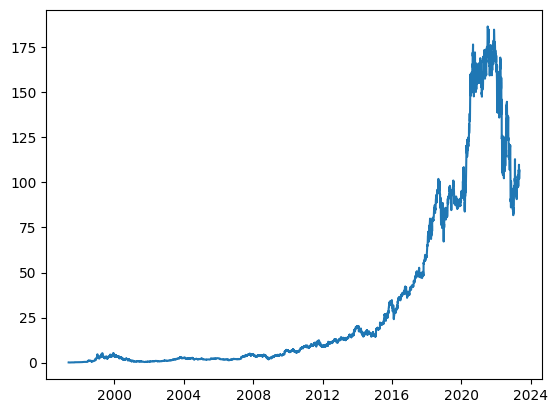

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,155.543503,156.875000,154.353500,152.313004
1,2021-03-26,156.875000,154.353500,152.313004,152.601501
2,2021-03-29,154.353500,152.313004,152.601501,153.786499
3,2021-03-30,152.313004,152.601501,153.786499,152.764496
4,2021-03-31,152.601501,153.786499,152.764496,154.703995
...,...,...,...,...,...
247,2022-03-17,141.852997,147.366501,153.104004,157.238998
248,2022-03-18,147.366501,153.104004,157.238998,161.250504
249,2022-03-21,153.104004,157.238998,161.250504,161.491501
250,2022-03-22,157.238998,161.250504,161.491501,164.889008


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

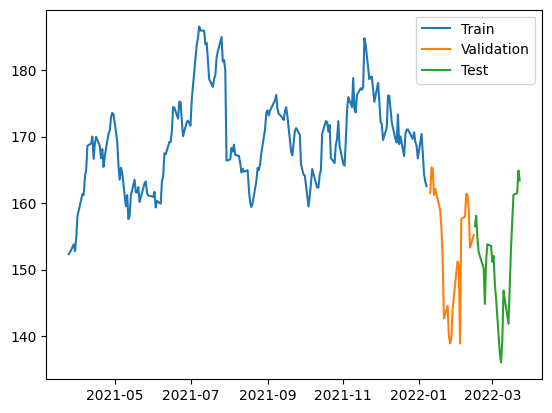

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np

# Define your training and validation data here (X_train, y_train, X_val, y_val)

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

# Assuming X_test and y_test are your test data and labels, respectively
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))
print(mae)
threshold = 10
if(mae<=threshold):
  accuracy = ( threshold-mae) * (100)
print(f"Accuracy: {accuracy:.2f}%")

Epoch 1/100
7/7 [==============================] - 3s 92ms/step - loss: 28642.5840 - mean_absolute_error: 169.0974 - val_loss: 23294.4551 - val_mean_absolute_error: 152.3859
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 28451.8262 - mean_absolute_error: 168.5339 - val_loss: 23150.6953 - val_mean_absolute_error: 151.9134
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 28288.4102 - mean_absolute_error: 168.0475 - val_loss: 22987.0234 - val_mean_absolute_error: 151.3736
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 28092.2266 - mean_absolute_error: 167.4624 - val_loss: 22775.2070 - val_mean_absolute_error: 150.6720
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 27822.5352 - mean_absolute_error: 166.6551 - val_loss: 22446.4902 - val_mean_absolute_error: 149.5765
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 27389.9648 - mean_absolute_error: 165.3527 - val_loss: 21933.

7/7 [==============================] - 0s 3ms/step


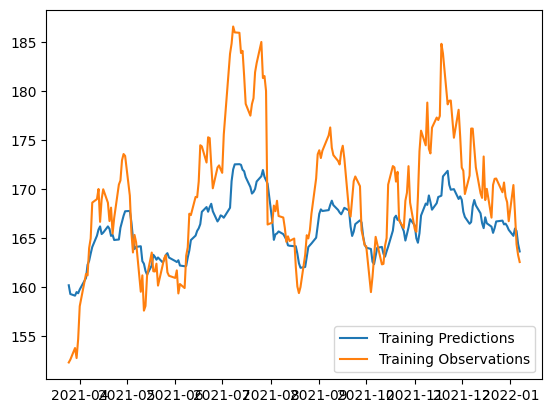

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 27ms/step


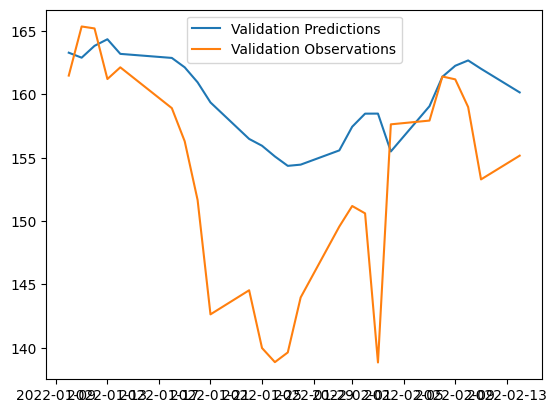

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 25ms/step


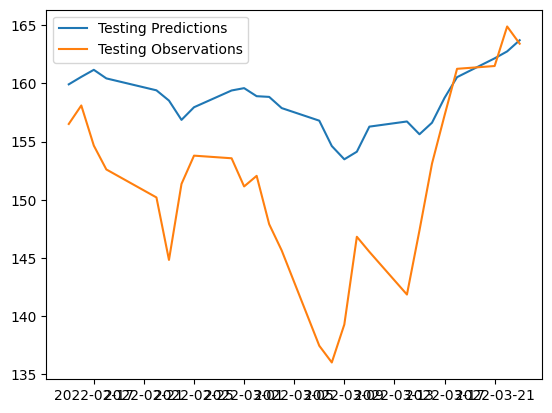

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

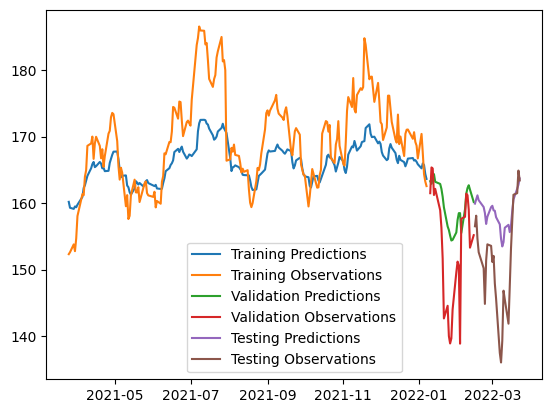

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


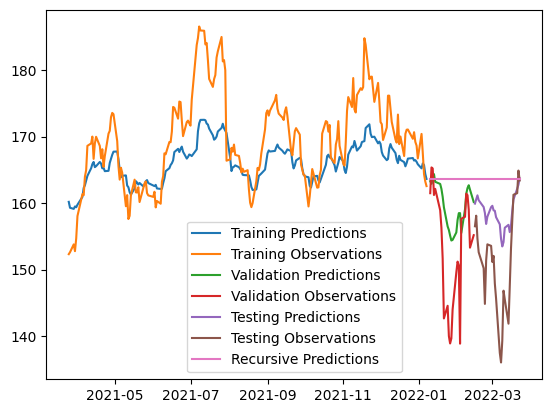

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])